Comenzamos cargandos las librerias y los datasets a analizar

In [16]:
# Importamos las librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargamos los datasets
df_games_full = pd.read_csv("../data/processed/dataset_games_full.csv")
df_reviews = pd.read_csv("../data/processed/dataset_reviews.csv")
df_users = pd.read_csv("../data/processed/users.csv")

In [17]:
df_users = pd.read_csv("../data/processed/users.csv")

Los datos los hemos obtenido de Kaggle, donde le usuario indica que la fuente el STEAMDB, la Base de datos oficial de Steam, por lo que estos datos son los oficiales publicados por la plataforma.

De esta plataforma obetenemos 4 archivos:
- games_metada.json : Contiene información dada por las empresas de la descripción del juego y de las etiquetas asociadas al juego.
- games.csv: Contiene información de compatibilidad, ventas y descuentos aportada por la plataforma (Steam)
- recomendations.csv: Reseñas dadas por los usuarios sobre el juego, y datos sobre las mismas reseñas, si ha sido útil, si gusta...
- users.csv: Obtiene los datos de los usuarios, con la cantidad de juegos de cada usuario y de las reseñas publicadas por el mismo.


Ahora, revisaremoss las primeras lineas de cada dataset para revisar la información que contiene cada uno.

In [18]:
# Datos iniciales de df_games_full
print("Mostrando las primeras filas del dataset df_games_full, que contiene informacion sobre los juegos de Steam obtenida de el fichero games.csv y games_metadata.json")
df_games_full.head()

Mostrando las primeras filas del dataset df_games_full, que contiene informacion sobre los juegos de Steam obtenida de el fichero games.csv y games_metadata.json


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,description,tags
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,Enter the dark underworld of Prince of Persia ...,"Action, Adventure, Parkour, Third Person, Grea..."
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,NaN,NaN
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,Monaco: What's Yours Is Mine is a single playe...,"Co-op, Stealth, Indie, Heist, Local Co-Op, Str..."
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,Escape Dead Island is a Survival-Mystery adven...,"Zombies, Adventure, Survival, Action, Third Pe..."
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,Dungeon of the Endless is a Rogue-Like Dungeon...,"Roguelike, Strategy, Tower Defense, Pixel Grap..."


In [19]:
# Datos iniciales de df_reviews ordenado de más horas a menos
print("Mostrando las primeras filas del dataset df_reviews, que contiene informacion sobre las reseñas de los juegos escritas por los usuarios, obtenidos de los ficheros recommendations.csv y users.csv")
df_reviews = df_reviews.sort_values(by="hours", ascending=False)

Mostrando las primeras filas del dataset df_reviews, que contiene informacion sobre las reseñas de los juegos escritas por los usuarios, obtenidos de los ficheros recommendations.csv y users.csv


Gracias a esto, obtenemos la siguiente leyenda de datos de cada columna:

- app_id: (KEY_ID) Código identificativo de cada juego
- description: (STRING) Descripción aportada por la empresa sobre el su juego
- tags: (LIST) Etiquetas añadidas por la empresa para categorizar el tipo de juego
- title: (STRING) Titulo del juego
- date_release: (AAAA-MM-DD) Fecha de lanzamiento del Juego en Steam
- win: (BOOLEAN) Compatibilidad con Windows
- mac: (BOOLEAN) Compatibilidad con MAC
- linux: (BOOLEAN) Compatibilidad con Linux
- rating: (STRING) Idea general de las reseñas generadas por los usuarios sobre el juego
- positive_ratio: (INT) Puntuación media del juego según las reseñas
- user_reviews: (INT) Cantidad total de reseñas sobre el juego
- price_final: (FLOAT) Precio final (actual en el momento de extracción de los datos)
- price_original: (FLOAT) Precio original
- discount: (FLOAT) Descuento (actual en el momento de la extracción de los datos)
- steam_deck: (BOOLEAN) Compatibilidad con Steam Deck
- helpful: (INT) Indica la cantidad de personas que han encontrado la reseña útil
- funny: (INT) Indica la cantidad de personas que han encontrado la reseña divertida
- date: (AAAA-MM-DD) Fecha de la reseña
- is_recommended: (BOOLEAN) Indica si el jugador que publicó la reseña recomienda o no la reseña
- hours: (FLOAT) Cantidad de horas que se ha jugado antes de publicar la reseña
- user_id: (KEY_ID) Id del usuario que publicó al reseña
- review_id: (KEY_ID) Id de la reseña
- products: (INT) Cantidad de juegos en la biblioteca del usuario
- reviews: (INT) Cantidad de reseñas publicadas por el usuario

Ahora, Mostraremos gráficamente los datasets para ir facilitando el entendimiento de los datos

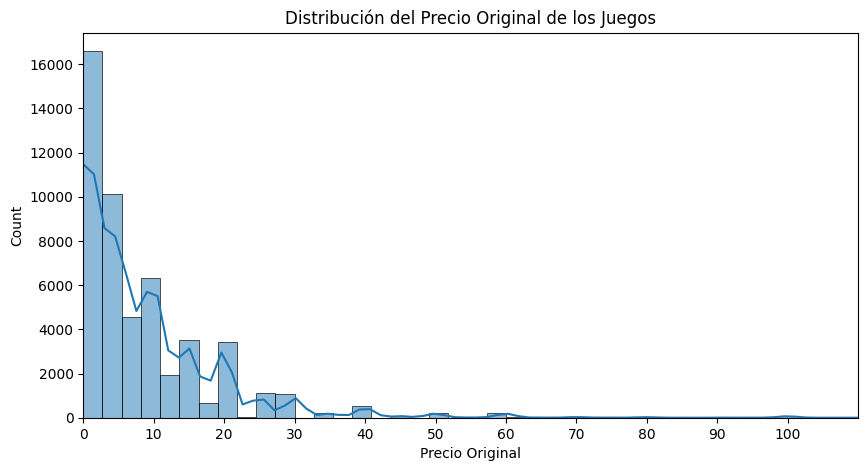

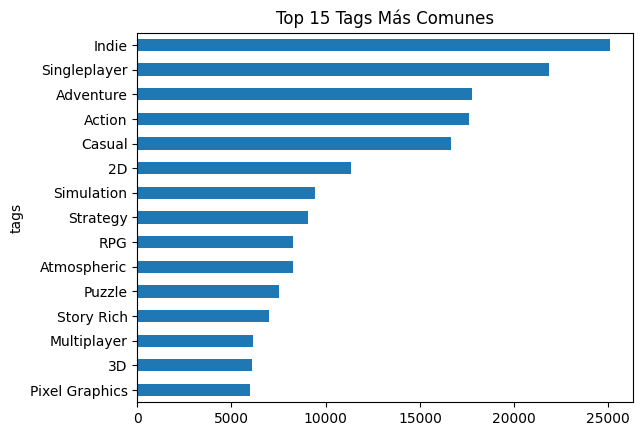

In [20]:
# Destribución de precio de los juegos
plt.figure(figsize=(10, 5))
sns.histplot(df_games_full["price_original"], bins=110, kde=True)
plt.title("Distribución del Precio Original de los Juegos")
plt.xlabel("Precio Original")
plt.xlim(0, 110)
plt.xticks(np.arange(0, 110, 10))
plt.show()

df_games_full["tags"].str.split(", ").explode().value_counts().head(15).plot(kind="barh", title="Top 15 Tags Más Comunes")
plt.gca().invert_yaxis()
plt.show()

Observamos que la mayoria de los juegos se tienen un valor original menor a 10€ lo que nos demuestra la cantidad de juegos de poca calidad y muy bajo precio que hay en steam y que, en otras ocasiones, ha mencionado que pueden saturar la plataforma por la gran cantidad de juegos que se generan de este tipo.
A su vez, observamos que el tipo de juego mas común son Indies, Singleplayer y aventura, lo que potencia el argumento anterior.

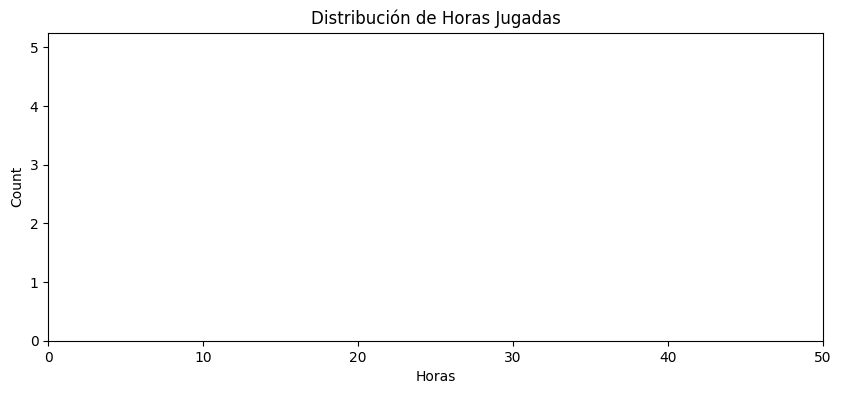

In [21]:
# Distribución de horas jugadas por los usuarios antes de publicar la reseña
plt.figure(figsize=(10, 4))
sns.histplot(df_reviews.head()["hours"], bins=100)
plt.title("Distribución de Horas Jugadas")
plt.xlabel("Horas")
plt.xticks(np.arange(0, 200, 10))
plt.xlim(0, 50)
plt.show()

In [22]:
# Descripcion de los datos products y reviews de df_users
df_users[["products", "reviews"]].describe()

,products,reviews
count,1.430606e+07,1.430606e+07
mean,1.163734e+02,2.876738e+00
std,2.438515e+02,7.987421e+00
min,0.000000e+00,0.000000e+00
25%,2.300000e+01,1.000000e+00
50%,5.500000e+01,1.000000e+00
75%,1.270000e+02,3.000000e+00
max,3.221400e+04,6.045000e+03


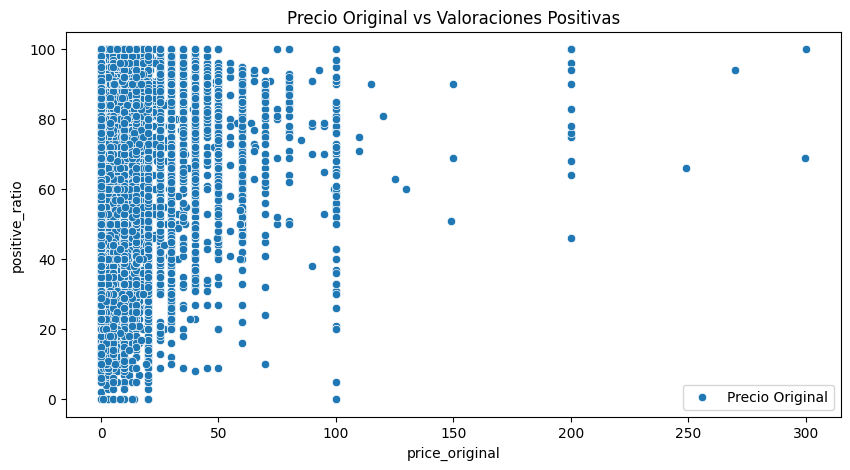

In [23]:
# Análisis de Precio Orignal vs Valoración
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_games_full, x="price_original", y="positive_ratio", label="Precio Original")
plt.title("Precio Original vs Valoraciones Positivas")
plt.legend()
plt.show()

In [24]:
# Credibilidad de los usuarios
full_helpful_user = df_reviews.groupby("user_id")["helpful"].sum().reset_index() # Agrupamos por user_id y sumamos la columna helpful
full_helpful_user.rename(columns={"helpful": "total_helpful"}, inplace=True) # Renombramos la columna helpful a total_helpful
df_users = df_users.merge(full_helpful_user, on="user_id", how="left") # Unimos el dataframe df_users con el dataframe full_helpful_user por la columna user_id
df_users["total_helpful"] = df_users["total_helpful"].fillna(0) # Rellenamos los valores nulos de la columna total_helpful con 0
df_users["credibility"] = df_users["total_helpful"] / (df_users["reviews"] + 1) # Calculamos la credibilidad dividiendo la columna total_helpful entre la columna reviews + 1 para evitar divisiones por cero
df_trusted_users = df_users[df_users["reviews"] >= 3] # Filtrar usuarios con al menos 3 reseñas publicadas

# Mostrar resumen
print("Usuarios con al menos 3 reviews:")
display(df_trusted_users[["user_id", "reviews", "total_helpful", "credibility"]].sort_values("credibility", ascending=False).head())


Usuarios con al menos 3 reviews:


,user_id,reviews,total_helpful,credibility
3377614,626194,3,19736.0,4934.00
9214747,451002,3,16965.0,4241.25
6580022,3087416,4,19421.0,3884.20
12675724,2076702,3,14837.0,3709.25
8328546,6611547,3,14641.0,3660.25


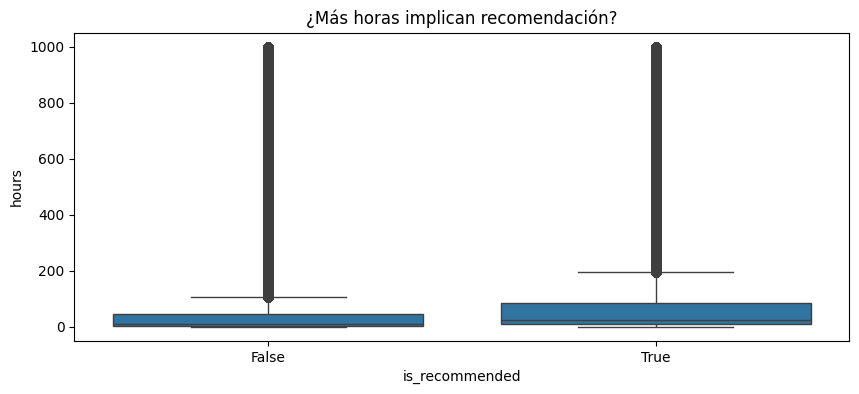

In [ ]:
# Relación entre horas jugadas y recomendación
#merge de df_reviews y df_trusted_users
df_trusted_reviews = df_reviews[df_reviews["user_id"].isin(df_trusted_users["user_id"])] # Filtrar reseñas de usuarios de confianza
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_trusted_reviews, x="is_recommended", y="hours")
plt.title("¿Más horas implican recomendación?")
plt.show()

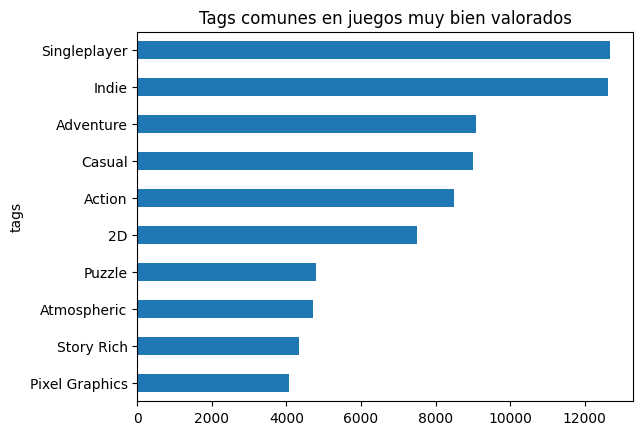

Juegos bien valorados con número de recomendaciones de usuarios confiables:


,title,positive_ratio,total_recomendations
23958,Team Fortress 2,93,177494.0
8686,The Witcher® 3: Wild Hunt,96,123834.0
10898,DARK SOULS™ III,94,121761.0
24289,Wallpaper Engine,98,109684.0
8619,Left 4 Dead 2,97,105846.0


In [27]:
# Que tipo de juego son exitosos según sus reseñas
df_highrated_games = df_games_full[df_games_full["positive_ratio"] > 80]
df_highrated_games["tags"].str.split(", ").explode().value_counts().head(10).plot(kind="barh", title="Tags comunes en juegos muy bien valorados")
plt.gca().invert_yaxis()
plt.show()
recommended_game = df_reviews[df_reviews["user_id"].isin(df_trusted_users["user_id"])]
recommended_game = recommended_game[recommended_game["is_recommended"] == True].groupby("app_id").size().reset_index(name="total_recomendations")

df_highrated_games = df_highrated_games.merge(recommended_game, on="app_id", how="left")
df_highrated_games["total_recomendations"] = df_highrated_games["total_recomendations"].fillna(0)

print("Juegos bien valorados con número de recomendaciones de usuarios confiables:")
display(df_highrated_games[["title", "positive_ratio", "total_recomendations"]].sort_values("total_recomendations", ascending=False).head())


In [ ]:
# Comparativa entre precio, valoraciones y recomendaciones de usuarios confiables
df_trusted_reviews = df_trusted_reviews.merge(df_trusted_users[["user_id", "credibility"]], on="user_id", how="left")# unimos el dataframe df_trusted_reviews con el dataframe df_trusted_users por la columna user_id
df_reviewed_game = df_trusted_reviews.merge(df_games_full[["app_id", "price_final", "price_original", "positive_ratio"]], on="app_id", how="left")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_reviewed_game, x="price_final", y="positive_ratio", hue="is_recommended", size="credibility", alpha=0.6, legend=False)
sns.scatterplot(data=df_reviewed_game, x="price_original", y="positive_ratio", hue="is_recommended", size="credibility", alpha=0.4, marker="X", legend=False)
plt.title("Precio vs Valoraciones según Recomendación y Credibilidad")
plt.xlabel("Precio (Final y Original)")
plt.ylabel("Valoración Positiva")
plt.show()

MemoryError: Unable to allocate 1.93 GiB for an array with shape (28709011, 3, 3) and data type float64

Error in callback <function _draw_all_if_interactive at 0x000001B7DE2C32E0> (for post_execute), with arguments args (),kwargs {}:


MemoryError: Unable to allocate 1.93 GiB for an array with shape (28709011, 3, 3) and data type float64